## Смотрим на данные и записываем их в бд, чтобы было удобнее работать

In [61]:
import os
import shelve
import pymorphy2
import time

In [34]:
with open('WMT-News.en-ru.ru', encoding = 'utf-8') as file:
    news_ru = file.readlines()   

In [35]:
news_ru[:5]

['Парламент не поддерживает поправку, дающую свободу Тимошенко\n',
 'Сегодня Парламент Украины в ходе внесения поправок в Уголовно-Процессуальный кодекс отклонил попытку отменить статью, согласно которой была осуждена лидер оппозиции, Юлия Тимошенко.\n',
 'Поправка, которая привела бы к освобождению находящейся в тюрьме бывшего премьер-министра, была отклонена во время второго чтения законопроекта о смягчении приговоров за экономические правонарушения.\n',
 'В октябре Тимошенко была приговорена к семи годам тюрьмы за подписание газовой сделки с Россией, которая была признана невыгодной.\n',
 'Приговор еще не окончательный; суд рассмотрит апелляцию Тимошенко в декабре.\n']

In [38]:
with shelve.open('news_ru') as db:
    for i,line in enumerate(news_ru):
        db[str(i)] = line[:-1]

In [ ]:
with open('WMT-News.en-ru.en', encoding = 'utf-8') as file:
    news_en = file.readlines()   
with shelve.open('news_en') as db:
    for i,line in enumerate(news_en):
        db[str(i)] = line[:-1]

In [40]:
with open('Wikipedia.en-ru.en', encoding = 'utf-8') as file:
    wiki_en = file.readlines()

In [41]:
wiki_en[:5]

['Average temperatures on the coast are in January and in July.\n',
 'In March 2004, Lithuania became a full member of the NATO.\n',
 ';Federal districtsFederal subjects are grouped into nine federal districts, each administered by an envoy appointed by the President of Russia.\n',
 'Unlike the federal subjects, the federal districts are not a subnational level of government, but are a level of administration of the federal government.\n',
 '73% of the population lives in urban areas while 27% in rural ones.\n']

In [42]:
with shelve.open('wiki_en') as db:
    for i,line in enumerate(wiki_en):
        db[str(i)] = line[:-1]

In [44]:
with open('Wikipedia.en-ru.ru', encoding = 'utf-8') as file:
    wiki_ru = file.readlines()   
with shelve.open('wiki_ru') as db:
    for i,line in enumerate(wiki_ru):
        db[str(i)] = line[:-1]

In [43]:
with shelve.open('wiki_en') as wiki:
    for i,key in enumerate(wiki):
        if i<5:
            print(wiki[key])

Average temperatures on the coast are in January and in July.
In March 2004, Lithuania became a full member of the NATO.
;Federal districtsFederal subjects are grouped into nine federal districts, each administered by an envoy appointed by the President of Russia.
Unlike the federal subjects, the federal districts are not a subnational level of government, but are a level of administration of the federal government.
73% of the population lives in urban areas while 27% in rural ones.


## Удаляем пунктуацию, нормализуем текст и записываем в новые бд 

In [36]:
morph = pymorphy2.MorphAnalyzer()
cache = {}
def normal_form(word): # для русских текстов
    if word in cache:
        return cache[word]
    w = None
    ms = morph.parse(word)
    for m in ms:
        if m.normal_form == word:
            w = m
            break
    if w is None:
        w = ms[0]
    cache[word] = w.normal_form.lower()
    return cache[word]

In [61]:
# лемматизируем русские новости
start = time.time()
lemmatized = {}
with shelve.open('news_ru') as news:
    for key in news:
        line = news[key]
        for char in line:
            if not (char.isalpha() or char == ' '):
                line = line.replace(char,' ')
        lemmas = []
        for token in line.split():
            lemmas.append(normal_form(token))
        lemmatized[key] = ' '.join(lemmas)
        
with shelve.open('news_ru_lemmatized') as news_ru_lemmatized:
    for key in lemmatized:
        news_ru_lemmatized[key] = lemmatized[key]
end = time.time()
print(end-start)

10.014132022857666


In [60]:
with shelve.open('news_ru_lemmatized') as news:
    for i,key in enumerate(news):
        if i<5:
            print(news[key])

парламент не поддерживать поправка давать свобода тимошенко
сегодня парламент украина в ход внесение поправка в уголовно процессуальный кодекс отклонить попытка отменить статья согласно который быть осудить лидер оппозиция юлий тимошенко
поправка который привести бы к освобождение находиться в тюрьма бывший премьер министр быть отклонить в время два чтение законопроект о смягчение приговор за экономический правонарушение
в октябрь тимошенко быть приговорить к семь год тюрьма за подписание газовый сделка с россия который быть признать невыгодный
приговор ещё не окончательный суд рассмотреть апелляция тимошенко в декабрь


In [68]:
# лемматизируем русскую википедию
start = time.time()
lemmatized = {}
with shelve.open('wiki_ru') as wiki:
    for key in wiki:
        line = wiki[key]
        for char in line:
            if not char.isalpha():
                if char == '\u0301' or char == '\u0300':
                    line = line.replace(char,'') # удаление символов ударения, иначе слова разбиваются (тк не буквенный символ)
                elif char != ' ':
                    line = line.replace(char,' ')
        lemmas = []
        for token in line.split():
            lemmas.append(normal_form(token))
        lemmatized[key] = ' '.join(lemmas)
        
with shelve.open('wiki_ru_lemmatized') as wiki_ru_lemmatized:
    for key in lemmatized:
        wiki_ru_lemmatized[key] = lemmatized[key]
end = time.time()
print(end-start)

705.1591701507568


In [63]:
with shelve.open('wiki_ru_lemmatized') as wiki:
    for i,key in enumerate(wiki):
        if i<5:
            print(wiki[key])

через неделя сентябрь германия начало вторжение в польша
марта год литва вступить в нато
россия также подразделяться на федеральный округ в каждый из который работать полномочный представитель президент россия
обладать право издание указ обязательный для исполнение на весь территория россия указ не должный противоречить федеральный закон
число занятой в промышленность трудоспособный население


In [119]:
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [82]:
# нормализуем английские новости
start = time.time()
lemmatized = {}
with shelve.open('news_en') as news:
    for key in news:
        line = news[key]
        for char in line:
            if not (char.isalpha() or char == ' '):
                line = line.replace(char,' ')
        # The if-statement in the list below is needed because there are cases where the POS  
        # don't fall into a wordnet POS category, e.g. pronouns, ("I", "PN") or determiners, ("the", "DT")
        lemmatized[key] = ' '.join([wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else 
                                    wnl.lemmatize(i) for i,j in pos_tag(line.split())])
        
with shelve.open('news_en_lemmatized') as news_en_lemmatized:
    for key in lemmatized:
        news_en_lemmatized[key] = lemmatized[key]
end = time.time()
print(end-start)

41.21514654159546


In [83]:
with shelve.open('news_en_lemmatized') as news:
    for i,key in enumerate(news):
        if i<5:
            print(news[key])

Parliament Does Not Support Amendment Freeing Tymoshenko
Today the Ukraine parliament dismiss within the Code of Criminal Procedure amendment the motion to revoke an article base on which the opposition leader Yulia Tymoshenko be sentence
The amendment that would lead to free the imprisoned former Prime Minister be revoke during second reading of the proposal for mitigation of sentence for economic offence
In October Tymoshenko be sentence to seven year in prison for enter into what be report to be a disadvantageous gas deal with Russia
The verdict be not yet final the court will hear Tymoshenko s appeal in December


In [85]:
# нормализуем английскую википедию
start = time.time()
lemmatized = {}
with shelve.open('wiki_en') as wiki:
    for key in wiki:
        line = wiki[key]
        for char in line:
            if not char.isalpha():
                if char == '\u0301' or char == '\u0300':
                    line = line.replace(char,'') # удаление символов ударения, чтобы при этом не разбивались слова
                elif char != ' ':
                    line = line.replace(char,' ')
                    
        lemmatized[key] = ' '.join([wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else 
                                    wnl.lemmatize(i) for i,j in pos_tag(line.split())])
        
with shelve.open('wiki_en_lemmatized') as wiki_en_lemmatized:
    for key in lemmatized:
        wiki_en_lemmatized[key] = lemmatized[key]
end = time.time()
print(end-start)

3581.0932681560516


In [86]:
with shelve.open('wiki_en_lemmatized') as wiki:
    for i,key in enumerate(wiki):
        if i<5:
            print(wiki[key])

Average temperature on the coast be in January and in July
In March Lithuania become a full member of the NATO
Federal districtsFederal subject be group into nine federal district each administer by an envoy appoint by the President of Russia
Unlike the federal subject the federal district be not a subnational level of government but be a level of administration of the federal government
of the population live in urban area while in rural one


## Строим тренировочный корпус

In [32]:
# немного изменённый алгоритм отсюда https://github.com/pgleasonjr/scrapers/blob/master/multitranscraper.py
import requests
from bs4 import BeautifulSoup
def translate(word):
    """ 
    Подключение к словарю, чтобы находить переводные эквиваленты.
    
    Функция берёт на вход слово (английское или руссое) и возвращает список со всеми его переводами из Мультитрана.
    Если входного слова нет в словаре, возвращаемый список будет пустым.
    """
    url = 'http://www.multitran.ru/c/m.exe?l1=1&l2=1&s='+word
    r = requests.get(url)
    
    if r.status_code != 200: # если 200 - то всё хорошо
        raise Error('Something went wrong with the word', word)
        
    soup = BeautifulSoup(r.content, 'html.parser')
    what_we_get = soup.select("a[href*=m.exe?t=]") # это главный трюк
    translations = [translation.text for translation in what_we_get]
        
    return translations

In [ ]:
translation_cache = {} # изначально он пустой, но потом создали БД с ним, чтобы сохранить эти данные,  
# поэтому теперь можно будет считывать его следующим образом:
with shelve.open('translation_cache') as cache_db:
    for key in cache_db:
        translation_cache[key] = cache_db[key]

In [128]:
def Pre_Conditions(eng_sent, rus_sent):
    """
    Выполняются ли для двух предложений необходимые условия, чтобы мы рассматривали их дальше 
    (на этапе тренировки включаем их в тренировочный корпус в качестве отрицательных примеров, 
    после создания классификатора передаём ему только такие пары, которые прошли эти проверки).
    """
    if First_Condition(eng_sent, rus_sent) == True:
        if Second_Condition(eng_sent, rus_sent) == True:
            return True
        
    return False


def First_Condition(eng_sent, rus_sent):
    """ Первое условие - что соотношение длин предложений не должно быть больше двух или меньше 0.5. """
    eng_length = len(eng_sent)
    rus_length = len(rus_sent)
    try:
        ratio = eng_length/rus_length
    except ZeroDivisionError:
        return False
    if ratio > 2 or ratio < 0.5:
        return False
    else:
        return True


def Second_Condition(first_sent, second_sent, return_equivalents_num=False, eng_first=True):
    """ 
    Второе условие - что хотя бы 40% слов в первом предложении имеют переводной эквивалент во втором.
    По умолчанию первое считается английским, второе русским.
    С помощью eng_first это можно изменить.
    """        
    first_sent = first_sent.lower() # just in case
    second_sent = second_sent.lower()
    first_sent_list = first_sent.split()
    second_sent_list = second_sent.split()
    equivalents_counter = 0

    for word in first_sent_list:
        if word not in translation_cache:
            translations = translate(word) # список, содержащий все переводы, найденные в Мультитране
            for i, translation in enumerate(translations):
                
                # удаляем знаки препинания (могут там встретиться!)
                for char in translation: 
                    if not (char.isalpha() or char == ' '):
                        translation = translation.replace(char,' ')

                translation = translation.lower().split()
                
                # если в переводе несколько слов - лемматизируем их
                if len(translation) > 1: 
                    if eng_first: # лемматизация для русского
                        for j, element in enumerate(translation):
                            translation[j] = normal_form(element)
                    else: # для английского
                        translation = ' '.join([wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else 
                                                wnl.lemmatize(i) for i,j in pos_tag(translation)])

                # обратно записываем лемматизированное выражение без знаков препинания
                translations[i] = translation # это список, состоящий из слов перевода 

            # заносим в кеш список из переводов, отсортированный по количеству слов в них -
            # чтобы сначала искать в предложении более длинные фрагменты
            translations.sort(key=lambda x: len(x), reverse=True)
            translation_cache[word]=translations

        # теперь все слова точно находятся в кеше перевода
        for translation in translation_cache[word]: # translation is a list
            length = len(translation)
            if length == 0:
                pass # если этот вариант перевода почему-то пустой, переходим к следующему

            elif length == 1: # если состоит из одного слова
                if translation[0] in second_sent_list:
                    equivalents_counter+=1
                    # чтобы перейти не к следующему варианту перевода, а к следующему слову в первом предложении, 
                    # тк для этого слова уже нашли эквивалент во втором предложении
                    break 

            elif length > 1: # если перевод содержит больше одного слова
                translation_as_string = ' '.join(translation)
                if translation_as_string in second_sent: # то есть эти слова встречаются в таком же порядке в предложении
                    equivalents_counter+=1
                    break # тоже переходим к следующему слову в первом предложении предложении   

    # если как минимум 40% слов в первом предложении имеет переводной эквивалент во втором          
    if equivalents_counter >= len(first_sent_list)/2.5:  
        if not return_equivalents_num:
            return True
        else:
            return equivalents_counter
    else:
        if not return_equivalents_num:
            return False
        else:
            return equivalents_counter

In [152]:
# в какой-то момент - заносим translation_cache в БД, чтобы потом, если что, заново его не создавать (это долго)
with shelve.open('translation_cache') as tr_cache:
    for key in translation_cache:
        tr_cache[key] = translation_cache[key]

In [62]:
os.chdir('data')

In [63]:
with shelve.open('news_en_lemmatized') as news_en:
    dict_news_en = dict(news_en)

In [64]:
with shelve.open('news_ru_lemmatized') as news_ru:
    dict_news_ru = dict(news_ru)

In [287]:
# проверяем, что пары предложений из золотого стандарта, которые действительно являются переводами друг друга, 
# такую проверку проходят
truth_sentences = []
false_sentences = []
for i in range(len(dict_news_en)):
    if Pre_Conditions(dict_news_en[str(i)], dict_news_ru[str(i)]):
        if Second_Condition(dict_news_ru[str(i)], dict_news_en[str(i)], eng_first=False):
            truth_sentences.append(i)
        else:
            false_sentences.append(i)
    else:
        false_sentences.append(i)

In [288]:
print(len(false_sentences)) # когда проверяли только в сторону англ-рус, их было 390

445


In [96]:
for digit in false_sentences[:10]:
    print(dict_news_en[str(digit)])
    print(dict_news_ru[str(digit)])
    print()

The result be worse than estimate by analyst
результат оказаться худой чем прогнозировать аналитика

The earnings on it year bond be
доходность она летний облигация составлять

And more be yet to come
далёкий больше

Still it be nothing world shatter
и весь же игра не вызывать сильный эмоция

So far everything be just right
пока весь очень хорошо

Sometimes the restarts be not enough and you need to learn a give section of the race by heart
иногда перезапуск недостаточно и вы приходиться заучивать наизусть отдельный участок гонка

EU Ambassadress Vicenová
посол в ес виценовый

No One Wants To Ban Our Cheese Specialties
никто не собираться запрещать наш сырой

It be no surprise that the idea be plentiful the company employ nearly half a million people
неудивительно что идея много в компания работать около полмиллиона человек

So far IMB seem to be get through the current crisis without any harm
пока кажется ibm не причинить вред нынешний кризис



In [97]:
# составляем отрицательные примеры для тренировочного корпуса - сначала проверяем второе условие только для пар англ-рус
negative_examples = {}
length = len(dict_news_en)
for i in range(length):
    for j in range(length):
        if i != j:
            if Pre_Conditions(dict_news_en[str(i)], dict_news_ru[str(j)]):
                negative_examples[str(i)+'+'+str(j)] = [dict_news_en[str(i)], dict_news_ru[str(j)]]

In [98]:
print(len(negative_examples)) 

3441782


In [103]:
for i, key in enumerate(negative_examples):
    if i < 10:
        print(negative_examples[key])

['Parliament Does Not Support Amendment Freeing Tymoshenko', 'вот почему ibm с лёгкость закладывать основа на несколько платформа если они не работать она отказываться от они']
['Parliament Does Not Support Amendment Freeing Tymoshenko', 'я никогда не думать что в конец свой карьера быть играть с хоккейный игрок как он']
['Parliament Does Not Support Amendment Freeing Tymoshenko', 'если он выиграть текущий ситуация остаться без изменение и футбол не быть двигаться вперёд']
['Parliament Does Not Support Amendment Freeing Tymoshenko', 'ясно один управление риска в отделение инвестиция пока не работать']
['Parliament Does Not Support Amendment Freeing Tymoshenko', 'водитель сбежать после серьёзный авария в суббота вечером в лихтенберг не оказать помощь раненый пассажир']
['Parliament Does Not Support Amendment Freeing Tymoshenko', 'как ни стремиться член конгресс предлагать поправка они продвигаться не быстрый чем в прошлое год']
['Parliament Does Not Support Amendment Freeing Tymoshenko'

In [114]:
Pre_Conditions('Parliament Does Not Support Amendment Freeing Tymoshenko', 'вот почему ibm с лёгкость закладывать основа на несколько платформа если они не работать она отказываться от они')

True

In [172]:
# в какой-то момент в negative_examples были пары предложений с уже вычисленными признаками, но мы собирались провести процедуру
# ещё раз, поэтому в качестве значений оставили только пары предложений
new_negative_examples = {}
for key in negative_examples:
    new_negative_examples[key] = [negative_examples[key][0],negative_examples[key][1]]

In [175]:
print(len(new_negative_examples))

3441782


In [176]:
# теперь предложения, попавшие в new_negative_examples, проверим на соблюдение второго условия в направлении рус-англ
negative_examples_2_0 = {}
for i,key in enumerate(new_negative_examples):
    eng_sent = new_negative_examples[key][0]
    rus_sent = new_negative_examples[key][1]
    if Second_Condition(rus_sent, eng_sent, eng_first=False):
        negative_examples_2_0[key] = new_negative_examples[key]
    if i%10000 == 0:
        print('Проверили %s предложений'%i)

Проверили 0 предложений
Проверили 10000 предложений
Проверили 20000 предложений
Проверили 30000 предложений
Проверили 40000 предложений
Проверили 50000 предложений
Проверили 60000 предложений
Проверили 70000 предложений
Проверили 80000 предложений
Проверили 90000 предложений
Проверили 100000 предложений
Проверили 110000 предложений
Проверили 120000 предложений
Проверили 130000 предложений
Проверили 140000 предложений
Проверили 150000 предложений
Проверили 160000 предложений
Проверили 170000 предложений
Проверили 180000 предложений
Проверили 190000 предложений
Проверили 200000 предложений
Проверили 210000 предложений
Проверили 220000 предложений
Проверили 230000 предложений
Проверили 240000 предложений
Проверили 250000 предложений
Проверили 260000 предложений
Проверили 270000 предложений
Проверили 280000 предложений
Проверили 290000 предложений
Проверили 300000 предложений
Проверили 310000 предложений
Проверили 320000 предложений
Проверили 330000 предложений
Проверили 340000 предложений

Проверили 2770000 предложений
Проверили 2780000 предложений
Проверили 2790000 предложений
Проверили 2800000 предложений
Проверили 2810000 предложений
Проверили 2820000 предложений
Проверили 2830000 предложений
Проверили 2840000 предложений
Проверили 2850000 предложений
Проверили 2860000 предложений
Проверили 2870000 предложений
Проверили 2880000 предложений
Проверили 2890000 предложений
Проверили 2900000 предложений
Проверили 2910000 предложений
Проверили 2920000 предложений
Проверили 2930000 предложений
Проверили 2940000 предложений
Проверили 2950000 предложений
Проверили 2960000 предложений
Проверили 2970000 предложений
Проверили 2980000 предложений
Проверили 2990000 предложений
Проверили 3000000 предложений
Проверили 3010000 предложений
Проверили 3020000 предложений
Проверили 3030000 предложений
Проверили 3040000 предложений
Проверили 3050000 предложений
Проверили 3060000 предложений
Проверили 3070000 предложений
Проверили 3080000 предложений
Проверили 3090000 предложений
Проверили 

In [177]:
print(len(negative_examples_2_0)) 

1473229


In [178]:
for i, key in enumerate(negative_examples_2_0):
    if i < 10:
        print(negative_examples_2_0[key])

['Today the Ukraine parliament dismiss within the Code of Criminal Procedure amendment the motion to revoke an article base on which the opposition leader Yulia Tymoshenko be sentence', 'к сожаление правило который не быть настолько совершенный как мы весь думать быть принять на общий собрание в июнь']
['Today the Ukraine parliament dismiss within the Code of Criminal Procedure amendment the motion to revoke an article base on which the opposition leader Yulia Tymoshenko be sentence', 'этот мера предложить член палата представитель боб гудлат республиканец вирджиния быть один конституционный поправка о бюджет или о чем либо друг который быть вынести на пленарный голосование конгресс это созыв']
['Today the Ukraine parliament dismiss within the Code of Criminal Procedure amendment the motion to revoke an article base on which the opposition leader Yulia Tymoshenko be sentence', 'этот вопрос сказать он требовать работа весь система образовать по принцип государственный экономический упра

In [137]:
# перепишем в словарик положительные примеры
length = len(dict_news_en)
positive_examples = {}
for i in range(length):
    positive_examples[str(i)] = [dict_news_en[str(i)], dict_news_ru[str(i)]]

In [138]:
print(len(positive_examples))

9006


In [139]:
for i, key in enumerate(positive_examples):
    if i<8:
        print(positive_examples[key])

['Parliament Does Not Support Amendment Freeing Tymoshenko', 'парламент не поддерживать поправка давать свобода тимошенко']
['Today the Ukraine parliament dismiss within the Code of Criminal Procedure amendment the motion to revoke an article base on which the opposition leader Yulia Tymoshenko be sentence', 'сегодня парламент украина в ход внесение поправка в уголовно процессуальный кодекс отклонить попытка отменить статья согласно который быть осудить лидер оппозиция юлий тимошенко']
['The amendment that would lead to free the imprisoned former Prime Minister be revoke during second reading of the proposal for mitigation of sentence for economic offence', 'поправка который привести бы к освобождение находиться в тюрьма бывший премьер министр быть отклонить в время два чтение законопроект о смягчение приговор за экономический правонарушение']
['In October Tymoshenko be sentence to seven year in prison for enter into what be report to be a disadvantageous gas deal with Russia', 'в октя

In [106]:
import random

In [179]:
# выберем рандомные ~10000 штук из отрицательных примеров, чотбы корпус был сбалансированным
random_numbers = set()
for i in range(10000):
    random_numbers.add(random.randint(0,len(negative_examples_2_0)))
print(len(random_numbers))

9959


In [180]:
negative_examples_shortened = {}
for i, pair in enumerate(negative_examples_2_0):
    if i in random_numbers:
        negative_examples_shortened[pair] = negative_examples_2_0[pair]
print(len(negative_examples_shortened))

9959


## Вычисляем значение признаков для тренировочного корпуса

In [201]:
# сначала - среднее соотношение длин параллельных предложений по золотому стандарту
ratios = []
for i in range(length):
    len_eng = len(dict_news_en[str(i)])
    len_rus = len(dict_news_ru[str(i)])
    try:
        ratios.append(len_eng/len_rus)
    except ZeroDivisionError:
        pass
mean = round(sum(ratios)/float(len(ratios)), 2)
print(mean)

0.99


In [198]:
# добавляем в positive_examples и negative_examples_shortened вычисленные признаки
for key in positive_examples:
    two_sentences = positive_examples[key]
    sent1 = two_sentences[0]
    sent2 = two_sentences[1]
    len1 = len(sent1)
    len2 = len(sent2)
    ratio = round(len2/len1, 2) # здесь не может быть деления на ноль, потому что такие предложения мы исключали
    positive_examples[key].append(len1)
    positive_examples[key].append(len2)
    positive_examples[key].append(len2-len1)
    positive_examples[key].append(ratio) 
    positive_examples[key].append(mean-ratio)
    equivalence_num1 = Second_Condition(sent1, sent2, return_equivalents_num=True)
    positive_examples[key].append(equivalence_num1)
    positive_examples[key].append(round(equivalence_num1/float(len1), 2))
    equivalence_num2 = Second_Condition(sent2, sent1, return_equivalents_num=True, eng_first=False)
    positive_examples[key].append(equivalence_num2)
    positive_examples[key].append(round(equivalence_num2/float(len2), 2))

In [199]:
for key in negative_examples_shortened:
    two_sentences = negative_examples_shortened[key]
    sent1 = two_sentences[0]
    sent2 = two_sentences[1]
    len1 = len(sent1)
    len2 = len(sent2)
    ratio = round(len2/len1, 2) # здесь не может быть деления на ноль, потому что такие предложения мы исключали
    negative_examples_shortened[key].append(len1)
    negative_examples_shortened[key].append(len2)
    negative_examples_shortened[key].append(len2-len1)
    negative_examples_shortened[key].append(ratio) 
    negative_examples_shortened[key].append(mean-ratio)
    equivalence_num1 = Second_Condition(sent1, sent2, return_equivalents_num=True)
    negative_examples_shortened[key].append(equivalence_num1)
    negative_examples_shortened[key].append(round(equivalence_num1/float(len1), 2))
    equivalence_num2 = Second_Condition(sent2, sent1, return_equivalents_num=True, eng_first=False)
    negative_examples_shortened[key].append(equivalence_num2)
    negative_examples_shortened[key].append(round(equivalence_num2/float(len2), 2))

In [203]:
# посмотрим, как они выглядят
for i, key in enumerate(positive_examples):
    if i<5:
        print(positive_examples[key])
print()
for i, key in enumerate(negative_examples_shortened):
    if i<5:
        print(negative_examples_shortened[key])

['Parliament Does Not Support Amendment Freeing Tymoshenko', 'парламент не поддерживать поправка давать свобода тимошенко', 56, 59, 3, 1.05, -0.06, 4, 0.07, 4, 0.07]
['Today the Ukraine parliament dismiss within the Code of Criminal Procedure amendment the motion to revoke an article base on which the opposition leader Yulia Tymoshenko be sentence', 'сегодня парламент украина в ход внесение поправка в уголовно процессуальный кодекс отклонить попытка отменить статья согласно который быть осудить лидер оппозиция юлий тимошенко', 181, 177, -4, 0.98, 0.01, 19, 0.1, 18, 0.1]
['The amendment that would lead to free the imprisoned former Prime Minister be revoke during second reading of the proposal for mitigation of sentence for economic offence', 'поправка который привести бы к освобождение находиться в тюрьма бывший премьер министр быть отклонить в время два чтение законопроект о смягчение приговор за экономический правонарушение', 170, 186, 16, 1.09, -0.1, 19, 0.11, 20, 0.11]
['In October

## Работа с классификатором

In [281]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import scale # для масштабирования
from sklearn.utils import shuffle

In [212]:
# теперь у нас готовы все примеры для обучения, составим окончательный корпус
# сначала преобразуем данные в датафрейм
dfr_negative = pd.DataFrame.from_dict(negative_examples_shortened, orient='index', columns=['eng_sent', 'rus_sent', 'len1', 'len2',
                                                                                            'len2-len1', 'ratio', 'mean-ratio',
                                                                                            'equivalence_num1', '%equivalence1',
                                                                                            'equivalence_num2', '%equivalence2'])

In [213]:
dfr_negative

,eng_sent,rus_sent,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2
1+8699,Today the Ukraine parliament dismiss within th...,в ближний время материал по данные факт быть н...,181,99,-82,0.55,0.44,12,0.07,7,0.07
3+564,In October Tymoshenko be sentence to seven yea...,если пацлик выиграть в четверг он мочь бы пред...,132,88,-44,0.67,0.32,11,0.08,6,0.07
3+828,In October Tymoshenko be sentence to seven yea...,никогда не вызывать сомнение однако что ксеноф...,132,74,-58,0.56,0.43,11,0.08,5,0.07
3+1184,In October Tymoshenko be sentence to seven yea...,поздний владелица автомобиль сообщить что она ...,132,91,-41,0.69,0.30,13,0.10,6,0.07
3+2120,In October Tymoshenko be sentence to seven yea...,фухиморить находиться в тюрьма с сентябрь год ...,132,104,-28,0.79,0.20,14,0.11,8,0.08
3+5878,In October Tymoshenko be sentence to seven yea...,с наибольший эмоция он хранить тот который пом...,132,194,62,1.47,-0.48,11,0.08,14,0.07
4+7943,The verdict be not yet final the court will he...,тем не менее он похвалить правительство за отв...,80,143,63,1.79,-0.80,6,0.07,10,0.07
6+2373,The proposal to remove Article from the Code o...,после это снимка отпечаток отправляться в asif...,150,107,-43,0.71,0.28,10,0.07,7,0.07
6+5831,The proposal to remove Article from the Code o...,кажется что процедура в поддержка выживание фи...,150,180,30,1.20,-0.21,12,0.08,10,0.06
6+8591,The proposal to remove Article from the Code o...,он быть оказать официальный приём с армейский ...,150,128,-22,0.85,0.14,11,0.07,8,0.06


In [216]:
dfr_positive = pd.DataFrame.from_dict(positive_examples, orient='index', columns=['eng_sent', 'rus_sent', 'len1', 'len2',
                                                                                  'len2-len1', 'ratio', 'mean-ratio',
                                                                                  'equivalence_num1', '%equivalence1',
                                                                                  'equivalence_num2', '%equivalence2'])

In [217]:
dfr_positive

,eng_sent,rus_sent,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2
0,Parliament Does Not Support Amendment Freeing ...,парламент не поддерживать поправка давать своб...,56,59,3,1.05,-0.06,4,0.07,4,0.07
1,Today the Ukraine parliament dismiss within th...,сегодня парламент украина в ход внесение попра...,181,177,-4,0.98,0.01,19,0.10,18,0.10
2,The amendment that would lead to free the impr...,поправка который привести бы к освобождение на...,170,186,16,1.09,-0.10,19,0.11,20,0.11
3,In October Tymoshenko be sentence to seven yea...,в октябрь тимошенко быть приговорить к семь го...,132,125,-7,0.95,0.04,20,0.15,16,0.13
4,The verdict be not yet final the court will he...,приговор ещё не окончательный суд рассмотреть ...,80,75,-5,0.94,0.05,9,0.11,9,0.12
5,Tymoshenko claim the verdict be a political re...,тимошенко утверждать что приговор являться пол...,124,117,-7,0.94,0.05,15,0.12,12,0.10
6,The proposal to remove Article from the Code o...,предложение отменить статья уголовно процессуа...,150,142,-8,0.95,0.04,15,0.10,14,0.10
7,Its ratification would require vote,для его ратификация потребоваться бы голос,35,42,7,1.20,-0.21,5,0.14,5,0.12
8,Libya s Victory,победа ливия,15,12,-3,0.80,0.19,2,0.13,2,0.17
9,The story of Libya s liberation or rebellion a...,в история освобождение или восстание ливия уже...,67,61,-6,0.91,0.08,8,0.12,8,0.13


In [222]:
print(dfr_negative.shape)
print(dfr_positive.shape)

(9959, 11)
(9006, 11)


In [219]:
# сохраним как csv
dfr_positive.to_csv('positive_examples.csv')
dfr_negative.to_csv('negative_examples.csv')

In [226]:
# добавим столбец с целевой переменной
dfr_positive['class'] = pd.Series(np.ones(dfr_positive.shape[0], dtype=int), index=dfr_positive.index)
dfr_negative['class'] = pd.Series(np.zeros(dfr_negative.shape[0], dtype=int), index=dfr_negative.index)

In [230]:
dfr_negative

,eng_sent,rus_sent,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2,class
1+8699,Today the Ukraine parliament dismiss within th...,в ближний время материал по данные факт быть н...,181,99,-82,0.55,0.44,12,0.07,7,0.07,0
3+564,In October Tymoshenko be sentence to seven yea...,если пацлик выиграть в четверг он мочь бы пред...,132,88,-44,0.67,0.32,11,0.08,6,0.07,0
3+828,In October Tymoshenko be sentence to seven yea...,никогда не вызывать сомнение однако что ксеноф...,132,74,-58,0.56,0.43,11,0.08,5,0.07,0
3+1184,In October Tymoshenko be sentence to seven yea...,поздний владелица автомобиль сообщить что она ...,132,91,-41,0.69,0.30,13,0.10,6,0.07,0
3+2120,In October Tymoshenko be sentence to seven yea...,фухиморить находиться в тюрьма с сентябрь год ...,132,104,-28,0.79,0.20,14,0.11,8,0.08,0
3+5878,In October Tymoshenko be sentence to seven yea...,с наибольший эмоция он хранить тот который пом...,132,194,62,1.47,-0.48,11,0.08,14,0.07,0
4+7943,The verdict be not yet final the court will he...,тем не менее он похвалить правительство за отв...,80,143,63,1.79,-0.80,6,0.07,10,0.07,0
6+2373,The proposal to remove Article from the Code o...,после это снимка отпечаток отправляться в asif...,150,107,-43,0.71,0.28,10,0.07,7,0.07,0
6+5831,The proposal to remove Article from the Code o...,кажется что процедура в поддержка выживание фи...,150,180,30,1.20,-0.21,12,0.08,10,0.06,0
6+8591,The proposal to remove Article from the Code o...,он быть оказать официальный приём с армейский ...,150,128,-22,0.85,0.14,11,0.07,8,0.06,0


In [231]:
# объединим в один файл и тоже сохраним как csv
frames = [dfr_negative, dfr_positive]
all_data = pd.concat(frames)
all_data.to_csv('all_data.csv')

In [232]:
all_data

,eng_sent,rus_sent,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2,class
1+8699,Today the Ukraine parliament dismiss within th...,в ближний время материал по данные факт быть н...,181,99,-82,0.55,0.44,12,0.07,7,0.07,0
3+564,In October Tymoshenko be sentence to seven yea...,если пацлик выиграть в четверг он мочь бы пред...,132,88,-44,0.67,0.32,11,0.08,6,0.07,0
3+828,In October Tymoshenko be sentence to seven yea...,никогда не вызывать сомнение однако что ксеноф...,132,74,-58,0.56,0.43,11,0.08,5,0.07,0
3+1184,In October Tymoshenko be sentence to seven yea...,поздний владелица автомобиль сообщить что она ...,132,91,-41,0.69,0.30,13,0.10,6,0.07,0
3+2120,In October Tymoshenko be sentence to seven yea...,фухиморить находиться в тюрьма с сентябрь год ...,132,104,-28,0.79,0.20,14,0.11,8,0.08,0
3+5878,In October Tymoshenko be sentence to seven yea...,с наибольший эмоция он хранить тот который пом...,132,194,62,1.47,-0.48,11,0.08,14,0.07,0
4+7943,The verdict be not yet final the court will he...,тем не менее он похвалить правительство за отв...,80,143,63,1.79,-0.80,6,0.07,10,0.07,0
6+2373,The proposal to remove Article from the Code o...,после это снимка отпечаток отправляться в asif...,150,107,-43,0.71,0.28,10,0.07,7,0.07,0
6+5831,The proposal to remove Article from the Code o...,кажется что процедура в поддержка выживание фи...,150,180,30,1.20,-0.21,12,0.08,10,0.06,0
6+8591,The proposal to remove Article from the Code o...,он быть оказать официальный приём с армейский ...,150,128,-22,0.85,0.14,11,0.07,8,0.06,0


In [235]:
data_shuffled = shuffle(all_data, random_state=11)

In [236]:
data_shuffled

,eng_sent,rus_sent,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2,class
151+2802,From Ben the photographer I learn that a styli...,похитить в ресторан в ниамей человек близкие к...,127,211,84,1.66,-0.67,10,0.08,13,0.06,0
2297,Among the most superficial layer be the asphal...,среди самый верхний слой находиться битум сост...,108,108,0,1.00,-0.01,14,0.13,15,0.14,1
6491,In the Voronezh region such a place have be de...,в воронежский область такой место определить э...,99,82,-17,0.83,0.16,8,0.08,8,0.10,1
535+2347,Football will be back on the happy wave people...,в он переехать в валье и после окончание соотв...,223,151,-72,0.68,0.31,15,0.07,13,0.09,0
5962,Start of a course that explore the End of the ...,начинаться курс который исследовать конец света,51,47,-4,0.92,0.07,5,0.10,6,0.13,1
6135,Therefore the second threat to economic growth...,поэтому два угроза рост экономика в россия воз...,110,93,-17,0.85,0.14,13,0.12,11,0.12,1
7784+5184,The work by HS Ltd suggest high speed service ...,мы недостаточно хорошо говорить по испански а ...,120,86,-34,0.72,0.27,10,0.08,6,0.07,0
5021,Then in the depth of winter well and truly fer...,затем глубокий зимой когда рыба уже хорошо и о...,119,133,14,1.12,-0.13,13,0.11,11,0.08,1
3217,It be curious how the system be crumble since ...,любопытно как рассыпаться этот система после т...,159,143,-16,0.90,0.09,16,0.10,17,0.12,1
6042,Several state and city be nonetheless move ahe...,несколько штат и городов тем не менее идти по ...,61,69,8,1.13,-0.14,7,0.11,7,0.10,1


In [237]:
data_shuffled[data_shuffled.columns[2:-1]]

,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2
151+2802,127,211,84,1.66,-0.67,10,0.08,13,0.06
2297,108,108,0,1.00,-0.01,14,0.13,15,0.14
6491,99,82,-17,0.83,0.16,8,0.08,8,0.10
535+2347,223,151,-72,0.68,0.31,15,0.07,13,0.09
5962,51,47,-4,0.92,0.07,5,0.10,6,0.13
6135,110,93,-17,0.85,0.14,13,0.12,11,0.12
7784+5184,120,86,-34,0.72,0.27,10,0.08,6,0.07
5021,119,133,14,1.12,-0.13,13,0.11,11,0.08
3217,159,143,-16,0.90,0.09,16,0.10,17,0.12
6042,61,69,8,1.13,-0.14,7,0.11,7,0.10


In [260]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

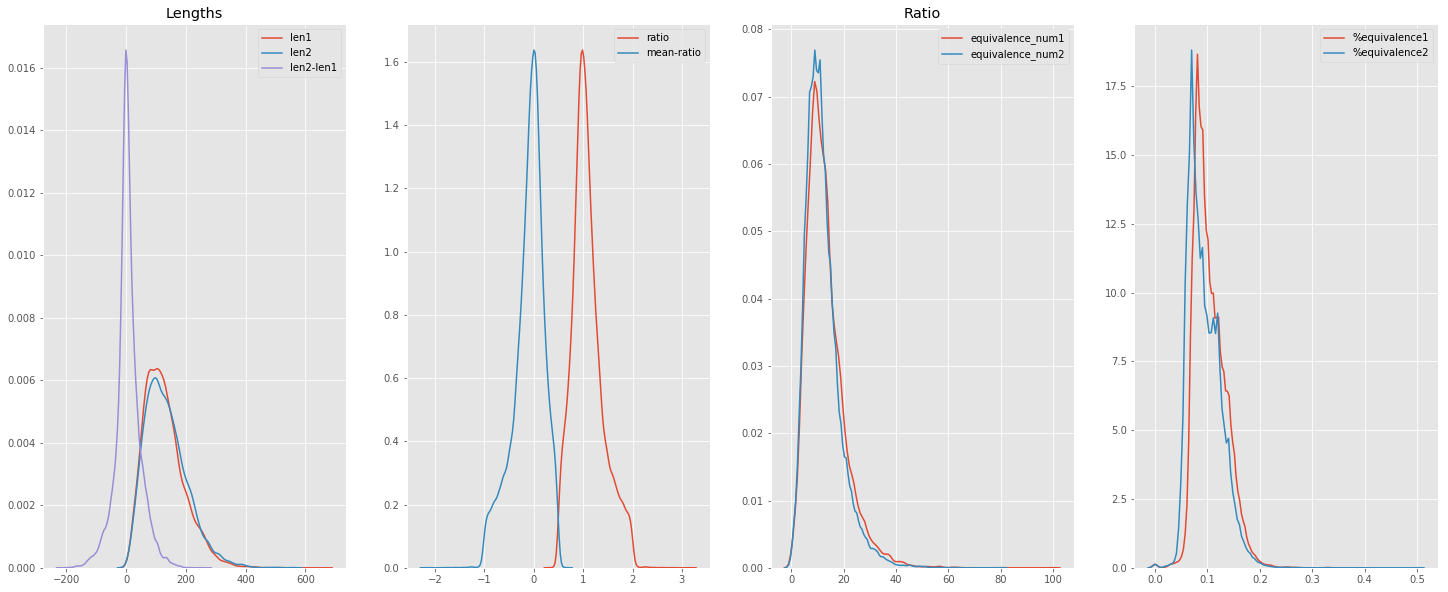

In [272]:
# посмотрим на распределения признаков
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(25, 10))
ax1.set_title('Lengths')
sns.kdeplot(all_data['len1'], ax=ax1)
sns.kdeplot(all_data['len2'], ax=ax1)
sns.kdeplot(all_data['len2-len1'], ax=ax1)
ax3.set_title('Ratio')
sns.kdeplot(all_data['ratio'], ax=ax2)
sns.kdeplot(all_data['mean-ratio'], ax=ax2)
ax5.set_title('Equivalence num')
sns.kdeplot(all_data['equivalence_num1'], ax=ax3)
sns.kdeplot(all_data['equivalence_num2'], ax=ax3)
ax6.set_title('Equivalence %')
sns.kdeplot(all_data['%equivalence1'], ax=ax4)
sns.kdeplot(all_data['%equivalence2'], ax=ax4)
plt.show()

In [241]:
X = scale(data_shuffled[data_shuffled.columns[2:-1]]) # убираем столбцы с предложениями и целевой переменной, масштабируем
y = data_shuffled['class'] # целевая переменная

C:\Users\boss\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [242]:
X

array([[-0.01110707,  1.09862958,  1.83968104, ..., -0.82446684,
         0.14362069, -1.10842251],
       [-0.29679959, -0.37785431, -0.15740263, ...,  0.8692822 ,
         0.4435454 ,  1.50864068],
       [-0.43212763, -0.75055898, -0.56157432, ..., -0.82446684,
        -0.60619111,  0.20010908],
       ...,
       [ 0.71064246,  1.52867343,  1.41173454, ..., -1.16321665,
         0.4435454 , -1.10842251],
       [-0.14643511,  0.28154626,  0.69849037, ..., -0.82446684,
        -0.60619111, -1.43555541],
       [-1.16891361, -1.2952812 , -0.30005146, ..., -0.82446684,
        -1.3560029 , -0.78128961]])

In [243]:
y

151+2802     0
2297         1
6491         1
535+2347     0
5962         1
6135         1
7784+5184    0
5021         1
3217         1
6042         1
3763+4181    0
3523+2303    0
8924+1960    0
2523         1
5684+5649    0
3517         1
8939+5108    0
570+5883     0
581+719      0
8441         1
4016         1
1824         1
4208         1
6315         1
8651+8621    0
3291+7048    0
8208+4628    0
1033         1
3033         1
2128         1
            ..
9002+1879    0
7732         1
7686+5836    0
1568         1
3598         1
4270+3569    0
2571+1881    0
2009         1
7819         1
1379+5159    0
4171+8732    0
7772+5350    0
8475+7987    0
6732+733     0
7680         1
5438         1
7484+4888    0
5818+6300    0
3589         1
3330+428     0
5817         1
7038+2121    0
5083+7947    0
5888+4026    0
7008         1
7718         1
3489+2210    0
6334+1916    0
3202+8620    0
178          1
Name: class, Length: 18965, dtype: int32

In [246]:
classifier = LogisticRegression()

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [248]:
classifier.fit(X_train, y_train) 

C:\Users\boss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [249]:
predictions = classifier.predict(X_test) #предсказание меток классов

In [252]:
print(y_test[:10])
print(predictions[:10])

4366         1
3748         1
3554         1
826+1165     0
4967         1
4716+8157    0
2631         1
2015         1
2121+1311    0
3966         1
Name: class, dtype: int32
[1 1 1 0 1 0 1 1 0 0]


In [253]:
classifier.coef_ # веса перед признаками

array([[-4.44109376, -3.80523529,  0.71088502, -0.46905221,  0.46905221,
         3.84575081,  0.03592815,  4.19117395, -0.47149347]])

In [255]:
metrics.accuracy_score(y_test, predictions) 

0.8764978431059275

In [256]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3294
           1       0.87      0.87      0.87      2965

   micro avg       0.88      0.88      0.88      6259
   macro avg       0.88      0.88      0.88      6259
weighted avg       0.88      0.88      0.88      6259



In [282]:
# а теперь с кросс-валидацией
scorer = metrics.make_scorer(metrics.f1_score)
cv_strategy = StratifiedKFold(n_splits=8, shuffle=True, random_state=11)
lr_scoring = cross_val_score(classifier, X, y, scoring = scorer, cv = cv_strategy)

C:\Users\boss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\boss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\boss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\boss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\boss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [286]:
print('Log mean:%s, max:%s, min:%s, std:%s'%(lr_scoring.mean(), lr_scoring.max(), lr_scoring.min(), lr_scoring.std()))

Log mean:0.8696841255692935, max:0.883616830796777, min:0.8621908127208481, std:0.00716305352329075


## Посчитаем значения признаков для корпуса Википедии

In [328]:
%%time
with shelve.open('wiki_en_lemmatized') as wiki_en:
    dict_wiki_en = dict(wiki_en)
with shelve.open('wiki_ru_lemmatized') as wiki_ru:
    dict_wiki_ru = dict(wiki_ru)    
    
dict_wiki_only_pairs = {}
for key in dict_wiki_en:
    dict_wiki_only_pairs[key] = [dict_wiki_en[key], dict_wiki_ru[key]]

Wall time: 2min 24s


In [332]:
# в dict_wiki_all находились вычисленные значения для некоторых пар предложений
# оставим только те, для которых вычислено
dict_with_computed_features = {}
for key in dict_wiki_all:
    if len(dict_wiki_all[key])!=2:
        dict_with_computed_features[key] = dict_wiki_all[key]

In [333]:
print(len(dict_with_computed_features))

224347


In [338]:
import copy

In [340]:
%%time
# сейчас они уже не пустые
# non_parallel_second = []
# parallel_second = []
dict_second = copy.deepcopy(dict_wiki_only_pairs)

# ВАРИАНТ 2 - сразу вычисляем все признаки для каждой пары

for i, key in enumerate(dict_second):
    if int(key) in parallel_second or int(key) in non_parallel_second:
        # если в прошлом мы уже находили, что они подходят/не подходят - переходим к следующей паре
        continue
    elif key in dict_with_computed_features:
        dict_second[key] = dict_with_computed_features[key]
    else: # вот тогда считаем заново
        two_sentences = dict_second[key]
        sent1 = two_sentences[0]
        sent2 = two_sentences[1]
        len1 = len(sent1)
        len2 = len(sent2)
        if len1 != 0 and len2 != 0:
            dict_second[key].append(len1)
            dict_second[key].append(len2)
            dict_second[key].append(len2-len1)
            ratio = round(len2/len1, 2)
            dict_second[key].append(ratio) 
            dict_second[key].append(mean-ratio)
            equivalence_num1 = Second_Condition(sent1, sent2, return_equivalents_num=True)
            dict_second[key].append(equivalence_num1)
            dict_second[key].append(round(equivalence_num1/float(len1), 2))
            equivalence_num2 = Second_Condition(sent2, sent1, return_equivalents_num=True, eng_first=False)
            dict_second[key].append(equivalence_num2)
            dict_second[key].append(round(equivalence_num2/float(len2), 2))
        elif len1 == 0 and len2 == 0: # если оба предложения пустые, считаем их параллельными
            parallel_second.append(int(key)) # скорее всего это в результате предобработки (например, если там были только числа)
        else: # если только одно из предложений пустое, а второе нет - считаем их непараллельными
            non_parallel_second.append(int(key))
    if i % 10000 == 0:
        print('Обработали предложений:',i)

Обработали предложений: 0
Обработали предложений: 10000
Обработали предложений: 20000
Обработали предложений: 30000
Обработали предложений: 40000
Обработали предложений: 50000
Обработали предложений: 60000
Обработали предложений: 70000
Обработали предложений: 80000
Обработали предложений: 100000
Обработали предложений: 110000
Обработали предложений: 120000
Обработали предложений: 130000
Обработали предложений: 140000
Обработали предложений: 160000
Обработали предложений: 170000
Обработали предложений: 180000
Обработали предложений: 190000
Обработали предложений: 200000
Обработали предложений: 210000
Обработали предложений: 220000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 230000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 240000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 250000
Обработали предложений: 260000
Обработали предложений: 270000
Обработали предложений: 280000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 290000
Обработали предложений: 300000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 310000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 320000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 330000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 340000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 350000
Обработали предложений: 360000
Обработали предложений: 370000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 380000
Обработали предложений: 390000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 400000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 410000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 420000
Обработали предложений: 430000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 440000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 450000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 460000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 470000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 480000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 490000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 500000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 510000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 520000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 530000
Обработали предложений: 540000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 550000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Обработали предложений: 560000
Обработали предложений: 570000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Wall time: 12h 3min 24s


In [341]:
# ПРОВЕРКА - что dict_wiki_only_pairs не изменился 
diff_length = set()
for key in dict_wiki_only_pairs:
    diff_length.add(len(dict_wiki_only_pairs[key]))
print(diff_length)

{2}


In [343]:
# обновляем БД с кешем
with shelve.open('translation_cache') as tr_cache:
    for key in translation_cache:
        tr_cache[key] = translation_cache[key]

In [342]:
# проверяем, что числа сходятся: элементы в словаре, где в списке два значения - это которые мы уже признали параллельными/нет
exclude_num2 = 0
for key in dict_second:
    if len(dict_second[key]) == 2:
        exclude_num2 += 1
print(exclude_num2)
print(len(parallel_second))
print(len(non_parallel_second))
print(len(parallel_second) + len(non_parallel_second))

14315
8041
6274
14315


In [348]:
for i, key in enumerate(dict_second):
    if i<10:
        print(dict_second[key])

['Average temperature on the coast be in January and in July', 'через неделя сентябрь германия начало вторжение в польша', 58, 56, -2, 0.97, 0.02, 3, 0.05, 2, 0.04]
['In March Lithuania become a full member of the NATO', 'марта год литва вступить в нато', 51, 31, -20, 0.61, 0.38, 5, 0.1, 5, 0.16]
['Federal districtsFederal subject be group into nine federal district each administer by an envoy appoint by the President of Russia', 'россия также подразделяться на федеральный округ в каждый из который работать полномочный представитель президент россия', 131, 120, -11, 0.92, 0.07, 11, 0.08, 10, 0.08]
['Unlike the federal subject the federal district be not a subnational level of government but be a level of administration of the federal government', 'обладать право издание указ обязательный для исполнение на весь территория россия указ не должный противоречить федеральный закон', 147, 129, -18, 0.88, 0.11, 10, 0.07, 5, 0.04]
['of the population live in urban area while in rural one', 'чис

In [347]:
%%time
for key in dict_second:
    if len(dict_second[key]) == 11:
        dict_second[key][6] = round(dict_second[key][6], 2)

Wall time: 770 ms


In [349]:
# если выше всё сходится - создаём словарь, в которых только пары предложений с признаками (для классификации)
for_classification_second = {}
for key in dict_second:
    if len(dict_second[key]) == 11:
        for_classification_second[key] = dict_second[key]

In [350]:
# посмотрим на словарь
print(len(for_classification_second))
for i, key in enumerate(for_classification_second):
    if i<10:
        print(for_classification_second[key])

558402
['Average temperature on the coast be in January and in July', 'через неделя сентябрь германия начало вторжение в польша', 58, 56, -2, 0.97, 0.02, 3, 0.05, 2, 0.04]
['In March Lithuania become a full member of the NATO', 'марта год литва вступить в нато', 51, 31, -20, 0.61, 0.38, 5, 0.1, 5, 0.16]
['Federal districtsFederal subject be group into nine federal district each administer by an envoy appoint by the President of Russia', 'россия также подразделяться на федеральный округ в каждый из который работать полномочный представитель президент россия', 131, 120, -11, 0.92, 0.07, 11, 0.08, 10, 0.08]
['Unlike the federal subject the federal district be not a subnational level of government but be a level of administration of the federal government', 'обладать право издание указ обязательный для исполнение на весь территория россия указ не должный противоречить федеральный закон', 147, 129, -18, 0.88, 0.11, 10, 0.07, 5, 0.04]
['of the population live in urban area while in rural one

## Применим классификатор 

In [351]:
# преобразуем в датафрейм
dfr_second = pd.DataFrame.from_dict(for_classification_second, orient='index', columns=['eng_sent', 'rus_sent', 'len1', 'len2',
                                                                                        'len2-len1', 'ratio', 'mean-ratio',
                                                                                        'equivalence_num1', '%equivalence1',
                                                                                        'equivalence_num2', '%equivalence2'])

In [353]:
dfr_second.shape

(558402, 11)

In [352]:
dfr_second

,eng_sent,rus_sent,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2
0,Average temperature on the coast be in January...,через неделя сентябрь германия начало вторжени...,58,56,-2,0.97,0.02,3,0.05,2,0.04
1,In March Lithuania become a full member of the...,марта год литва вступить в нато,51,31,-20,0.61,0.38,5,0.10,5,0.16
2,Federal districtsFederal subject be group into...,россия также подразделяться на федеральный окр...,131,120,-11,0.92,0.07,11,0.08,10,0.08
3,Unlike the federal subject the federal distric...,обладать право издание указ обязательный для и...,147,129,-18,0.88,0.11,10,0.07,5,0.04
4,of the population live in urban area while in ...,число занятой в промышленность трудоспособный ...,55,55,0,1.00,-0.01,4,0.07,2,0.04
5,Association football be one of the most popula...,традиционно в россия популярный настольный инт...,70,64,-6,0.91,0.08,5,0.07,4,0.06
6,St Mary St Nicholas St Andrew St George St Ale...,сайт комиссия при президент российский федерац...,132,108,-24,0.82,0.17,4,0.03,5,0.05
7,A Augustinavichiute and source of socionics,о статус соционик существовать противоположный...,43,53,10,1.23,-0.24,1,0.02,2,0.04
8,Linguistics be the scientific study of languag...,лингвистика язык изучать язык как код то есть ...,138,143,5,1.04,-0.05,11,0.08,10,0.07
9,J,далее,1,5,4,5.00,-4.01,0,0.00,0,0.00


In [354]:
# убираем столбцы с предложениями и масштабируем
data_second = scale(dfr_second[dfr_second.columns[2:]]) 

C:\Users\boss\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [358]:
data_second.shape

(558402, 9)

In [359]:
for i, el in enumerate(data_second):
    if i<10:
        print(el)

[-0.29226741 -0.32254231 -0.01916864 -0.16299679  0.16299679 -0.60435076
 -0.64891415 -0.70187279 -0.70273022]
[-0.34837709 -0.53986414 -0.55643032 -1.07475757  1.07475757 -0.39395154
  0.16043816 -0.34321441  1.26741247]
[ 0.29287639  0.23380157 -0.28779948 -0.28963023  0.28963023  0.23724613
 -0.16330277  0.25454955 -0.04601599]
[ 0.42112709  0.31203742 -0.49673457 -0.39093699  0.39093699  0.13204652
 -0.32517323 -0.34321441 -0.70273022]
[-0.31631441 -0.33123519  0.04052711 -0.08701673  0.08701673 -0.49915115
 -0.32517323 -0.70187279 -0.70273022]
[-0.19607939 -0.25299933 -0.13856012 -0.31495692  0.31495692 -0.39395154
 -0.32517323 -0.4627672  -0.37437311]
[ 0.30089206  0.12948709 -0.6758218  -0.54289712  0.54289712 -0.49915115
 -0.97265507 -0.34321441 -0.53855167]
[-0.41250243 -0.34862093  0.33900582  0.4954971  -0.4954971  -0.81474998
 -1.13452553 -0.70187279 -0.70273022]
[ 0.34898607  0.43373765  0.18976646  0.01429002 -0.01429002  0.23724613
 -0.16330277  0.25454955 -0.21019455]
[

In [355]:
predictions_second = classifier.predict(data_second)
predictions_second.shape

(558402,)

In [360]:
# добавим столбец с предсказаниями
dfr_second['prediction'] = pd.Series(predictions_second, index=dfr_second.index)

In [361]:
dfr_second

,eng_sent,rus_sent,len1,len2,len2-len1,ratio,mean-ratio,equivalence_num1,%equivalence1,equivalence_num2,%equivalence2,prediction
0,Average temperature on the coast be in January...,через неделя сентябрь германия начало вторжени...,58,56,-2,0.97,0.02,3,0.05,2,0.04,0
1,In March Lithuania become a full member of the...,марта год литва вступить в нато,51,31,-20,0.61,0.38,5,0.10,5,0.16,1
2,Federal districtsFederal subject be group into...,россия также подразделяться на федеральный окр...,131,120,-11,0.92,0.07,11,0.08,10,0.08,0
3,Unlike the federal subject the federal distric...,обладать право издание указ обязательный для и...,147,129,-18,0.88,0.11,10,0.07,5,0.04,0
4,of the population live in urban area while in ...,число занятой в промышленность трудоспособный ...,55,55,0,1.00,-0.01,4,0.07,2,0.04,0
5,Association football be one of the most popula...,традиционно в россия популярный настольный инт...,70,64,-6,0.91,0.08,5,0.07,4,0.06,0
6,St Mary St Nicholas St Andrew St George St Ale...,сайт комиссия при президент российский федерац...,132,108,-24,0.82,0.17,4,0.03,5,0.05,0
7,A Augustinavichiute and source of socionics,о статус соционик существовать противоположный...,43,53,10,1.23,-0.24,1,0.02,2,0.04,0
8,Linguistics be the scientific study of languag...,лингвистика язык изучать язык как код то есть ...,138,143,5,1.04,-0.05,11,0.08,10,0.07,0
9,J,далее,1,5,4,5.00,-4.01,0,0.00,0,0.00,0


In [ ]:
# запишем результаты в файл
dfr_first.to_csv('predictions_first_variant.csv')

In [362]:
dfr_second.to_csv('predictions_second_variant.csv')

In [366]:
# index - это названия строк (тоже str)
classified_as_parallel = []
classified_as_non_parallel = []
for index, row in dfr_second.iterrows():
    name = index # ключ словаря
    prediction = row['prediction']
    if prediction == 1:
        classified_as_parallel.append(int(name))
    else:
        classified_as_non_parallel.append(int(name))

In [367]:
# добавляем предложения, ещё на предварителньом этапе классифицированные как параллельные/нет
for element in parallel_second:
    classified_as_parallel.append(element)
for element in non_parallel_second: 
    classified_as_non_parallel.append(element)

In [368]:
# теперь отсортируем полученные списки, чтобы предложения шли порядке, как они встречались в тексте
classified_as_parallel.sort()
classified_as_non_parallel.sort()

In [370]:
# словари без лемматизации (будем брать предложения оттуда, потому что в датафреймах - лемматизированные)
with shelve.open('wiki_en') as wiki_en:
    dict_wiki_en = dict(wiki_en)
with shelve.open('wiki_ru') as wiki_ru:
    dict_wiki_ru = dict(wiki_ru)

In [371]:
# проверка: сумма длин = длина изначального словаря
print(len(classified_as_parallel), len(classified_as_non_parallel))
print(len(classified_as_parallel)+len(classified_as_non_parallel))
print(len(dict_wiki_en))

271972 300745
572717
572717


In [374]:
# записываем параллельные в файлы
with open('parallel_en.txt', 'w', encoding = 'utf-8') as parallel_en:
    for number in classified_as_parallel:
        parallel_en.write(dict_wiki_en[str(number)]+'\n')
with open('parallel_ru.txt', 'w', encoding = 'utf-8') as parallel_ru:
    for number in classified_as_parallel:
        parallel_ru.write(dict_wiki_ru[str(number)]+'\n')

In [375]:
# записываем непараллельные в файлы
with open('non_parallel_en.txt', 'w', encoding = 'utf-8') as non_parallel_en:
    for number in classified_as_non_parallel:
        non_parallel_en.write(dict_wiki_en[str(number)]+'\n')
with open('non_parallel_ru.txt', 'w', encoding = 'utf-8') as non_parallel_ru:
    for number in classified_as_non_parallel:
        non_parallel_ru.write(dict_wiki_ru[str(number)]+'\n')